In [1]:
from chebGreen.greenlearning.utils import DataProcessor
from chebGreen.greenlearning.model import *
from chebGreen.backend import plt
from chebGreen.utils import runCustomScript

# %env TF_MLC_LOGGING=1
# %env TF_CPP_MIN_LOG_LEVEL=2

In [2]:
example = 'fractional'
script = 'generate_fractional'

In [3]:
%%time
theta = 0.9
runCustomScript(script, example, theta)

Number of samples: 250
Length scale: 0.01
Nf: 1000
Nu: 100
Noise: 0%
---------------------------------------
> In chebfun2/constructor (line 121)
In chebfun2 (line 82)
In generate_fractional (line 31) 
Step = 1/250
Step = 2/250
Step = 3/250
Step = 4/250
Step = 5/250
Step = 6/250
Step = 7/250
Step = 8/250
Step = 9/250
Step = 10/250
Step = 11/250
Step = 12/250
Step = 13/250
Step = 14/250
Step = 15/250
Step = 16/250
Step = 17/250
Step = 18/250
Step = 19/250
Step = 20/250
Step = 21/250
Step = 22/250
Step = 23/250
Step = 24/250
Step = 25/250
Step = 26/250
Step = 27/250
Step = 28/250
Step = 29/250
Step = 30/250
Step = 31/250
Step = 32/250
Step = 33/250
Step = 34/250
Step = 35/250
Step = 36/250
Step = 37/250
Step = 38/250
Step = 39/250
Step = 40/250
Step = 41/250
Step = 42/250
Step = 43/250
Step = 44/250
Step = 45/250
Step = 46/250
Step = 47/250
Step = 48/250
Step = 49/250
Step = 50/250
Step = 51/250
Step = 52/250
Step = 53/250
Step = 54/250
Step = 55/250
Step = 56/250
Step = 57/250
Step = 58

In [4]:
data = DataProcessor("datasets/fractional/0.90.mat")
data.generateDataset(trainRatio = 0.95)

/Users/hsharsh/continousegf/main/chebGreen/greenlearning/utils.py:31: ComplexWarning: Casting complex values to real discards the imaginary part
  U = torch.from_numpy(data['U'].astype(dtype = config(np)))


In [13]:
import scipy
X = scipy.io.loadmat("datasets/fractional/0.90.mat")

In [14]:
U = X['U']

In [15]:
F = X['F']

In [25]:
F.shape

(1000, 250)

In [40]:
np.linspace(0,999,250).astype(int)

array([  0,   4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48,
        52,  56,  60,  64,  68,  72,  76,  80,  84,  88,  92,  96, 100,
       104, 108, 112, 116, 120, 124, 128, 132, 136, 140, 144, 148, 152,
       156, 160, 164, 168, 172, 176, 180, 184, 188, 192, 196, 200, 204,
       208, 212, 216, 220, 224, 228, 232, 236, 240, 244, 248, 252, 256,
       260, 264, 268, 272, 276, 280, 284, 288, 292, 296, 300, 304, 308,
       312, 316, 320, 324, 328, 333, 337, 341, 345, 349, 353, 357, 361,
       365, 369, 373, 377, 381, 385, 389, 393, 397, 401, 405, 409, 413,
       417, 421, 425, 429, 433, 437, 441, 445, 449, 453, 457, 461, 465,
       469, 473, 477, 481, 485, 489, 493, 497, 501, 505, 509, 513, 517,
       521, 525, 529, 533, 537, 541, 545, 549, 553, 557, 561, 565, 569,
       573, 577, 581, 585, 589, 593, 597, 601, 605, 609, 613, 617, 621,
       625, 629, 633, 637, 641, 645, 649, 653, 657, 661, 666, 670, 674,
       678, 682, 686, 690, 694, 698, 702, 706, 710, 714, 718, 72

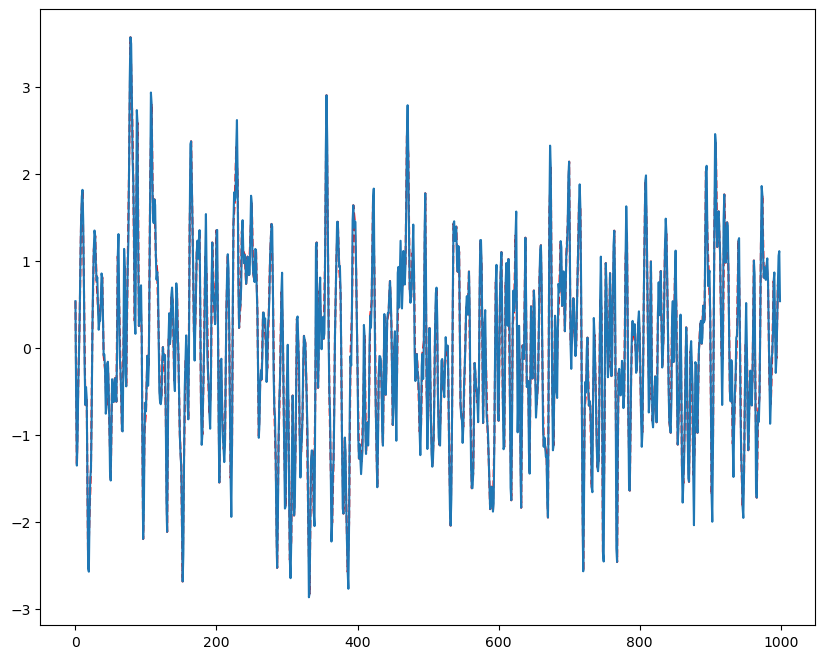

In [42]:
plt.figure(figsize = (10,8))
subset = np.linspace(0,999,500).astype(int)
plt.plot(np.linspace(0,999,500).astype(int),F[subset,0], 'r--')
plt.plot(np.linspace(0,999,1000).astype(int),F[:,0])

In [5]:
model = GreenNN()
dimension = 1
domain = [-1,1,-1,1]
layerConfig = [50,50,50,50]
activation = 'rational'
homogeneousBC = False
model.build(dimension = dimension, domain = domain, layerConfig = layerConfig, activation = activation, homogeneousBC = homogeneousBC)

In [6]:
%%time
lossHistory = model.train(data, epochs = {'adam':int(1000), 'lbfgs':int(0)})

Training with Adam:
Loss at epoch 100: Training = 9.767E-02, Validation = 9.365E-02
Loss at epoch 200: Training = 6.962E-03, Validation = 9.476E-03
Loss at epoch 300: Training = 2.811E-03, Validation = 5.180E-03
Loss at epoch 400: Training = 1.955E-03, Validation = 4.043E-03
Loss at epoch 500: Training = 1.532E-03, Validation = 3.431E-03
Loss at epoch 600: Training = 1.287E-03, Validation = 3.065E-03
Loss at epoch 700: Training = 1.135E-03, Validation = 2.860E-03
Loss at epoch 800: Training = 1.035E-03, Validation = 2.727E-03
Loss at epoch 900: Training = 9.612E-04, Validation = 2.636E-03
Loss at epoch 1000: Training = 9.055E-04, Validation = 2.570E-03
Training with LBFGS:
CPU times: user 46.3 s, sys: 7.63 s, total: 54 s
Wall time: 1min 31s


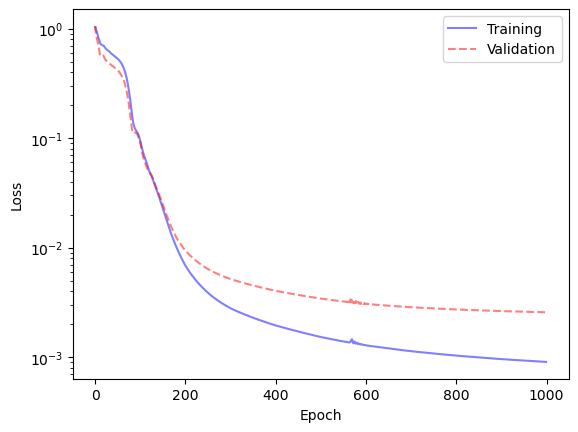

In [7]:
plt.figure()
plt.semilogy(range(len(lossHistory['training'])), lossHistory['training'], 'b', alpha = 0.5)
plt.semilogy(range(len(lossHistory['validation'])), lossHistory['validation'], 'r--', alpha = 0.5)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training','Validation'])

In [8]:
# model = GreenNN()
# model.build(dimension = 1, domain = [-1,1,-1,1], layerConfig = [50,50,50,50], activation = 'rational', homogeneousBC = False, loadPath = 'savedModels/frac9')

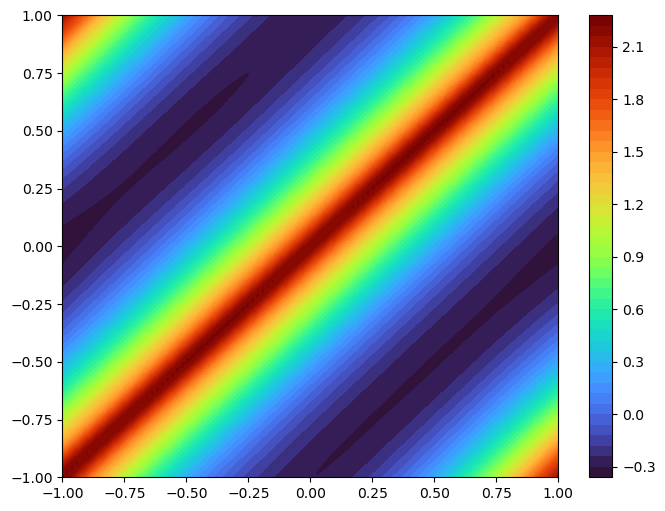

In [9]:
xF, xU = data.xF, data.xU
x, y = np.meshgrid(xU, xF)
G = model.evaluateG(x,y)

fig = plt.figure(figsize = (8,6))
plt.contourf(x,y,G, 50, cmap = 'turbo', vmin = np.min(G), vmax = np.max(G))
plt.colorbar()

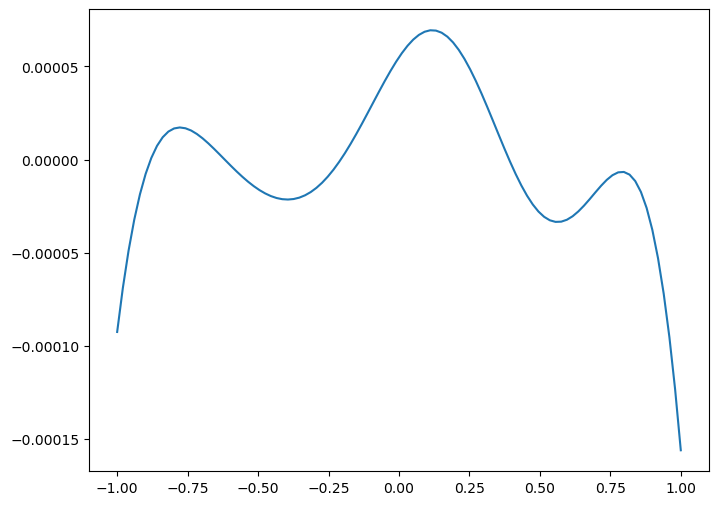

In [10]:
u_hom = model.evaluateN(xU)

fig = plt.figure(figsize = (8,6))
plt.plot(xU, u_hom)

In [10]:
model.saveModels('savedModels/frac')